## Ques - 1a and 1b : Recording values from WiFi Analyzer App

In [305]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import math

# Values written from time graph in WiFi Analyzer app
# I have taken average for few distances like 2 and 4 as for the same distance rssi values was different
distances = [1, 2, 3, 4, 5, 6, 7, 10, 18, 41]
rssiVal = [-50, -54, -57, -59, -61, -63, -64, -68, -73,  -80]

# Total number of data
n = 10

# Converting array into numpy array 
distances = np.array(distances)
rssiVal = np.array(rssiVal, dtype='int')
originalDistance = np.array(distances, dtype='int')
# taking log10 of all the distance values so as to plot distance in log scale
distances = np.log10(distances)

## 1c : Plotting log(distance) versus RSSI Value graph

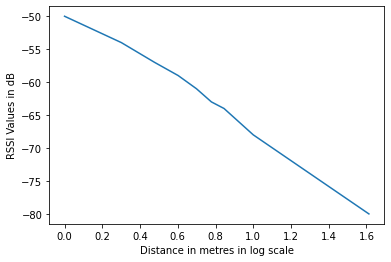

In [306]:
plt.plot(distances, rssiVal)
plt.ylabel('RSSI Values in dB')
plt.xlabel('Distance in metres in log scale')
plt.show()

## 1d : Drawing a best fit line and finding path loss exponent

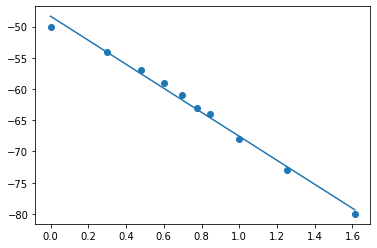

In [307]:
# We will use already existing function polyfit to get the best fit line
# Polyfit function takes 3 arguements
# One is the x values, second is the y values, and third is the dimension of the fitting polynomial which is 1 in our case

slope, intercept = np.polyfit(distances, rssiVal, 1)

#add points to plot
plt.scatter(distances, rssiVal)

#add line of best fit to plot
# print(x)
plt.plot(distances, slope*distances + intercept)


In [308]:
#path loss exponent
pathLossExponent = -slope/ 10
print(pathLossExponent)

1.9226060108168876


## 1e : Finding variance

In [309]:
error = 0
for i in range(n):
    error += abs(rssiVal[i] - (slope*distances[i] + intercept))
print('Variance : ', error/(n-1))

Variance :  0.7228378549981637


## Ques - 2a : Distance computed from the following formula

We know that P<sub>r</sub>(d) = P<sub>r</sub>(d<sub>0</sub>) - 10 * n * log<sub>10</sub>(d/d<sub>0</sub>)  <br>
Here d<sub>0</sub> = 1 <br>
P<sub>r</sub>(d<sub>0</sub>) = RSSI Value at distance 1 <br>
P<sub>r</sub>(d) = RSSI Value at distance d <br>
n = path loss exponent

In [310]:
rssiAt1 = -51
computedDistance = np.array([])
for i in range(n):
    powerDiff = rssiAt1 - rssiVal[i]
    exponentTerm = powerDiff / (10 * pathLossExponent)
    d = math.pow(10, exponentTerm)
    computedDistance = np.append(computedDistance, d)
for i in range(n):
    print('Actual distance : ', originalDistance[i], ' <---> Computed distance : ', round(computedDistance[i], 2))

Actual distance :  1  <---> Computed distance :  0.89
Actual distance :  2  <---> Computed distance :  1.43
Actual distance :  3  <---> Computed distance :  2.05
Actual distance :  4  <---> Computed distance :  2.61
Actual distance :  5  <---> Computed distance :  3.31
Actual distance :  6  <---> Computed distance :  4.21
Actual distance :  7  <---> Computed distance :  4.74
Actual distance :  10  <---> Computed distance :  7.66
Actual distance :  18  <---> Computed distance :  13.94
Actual distance :  41  <---> Computed distance :  32.24


## Ques - 2b : Average errror in distance 

In [311]:
#Finding error in distance
error = 0
for i in range(n):
    error += (abs(computedDistance[i] - originalDistance[i]))
print('Total error : ', error, 'metres')
print('Average error values : ', error/n, 'metres')

Total error :  23.91857220511565 metres
Average error values :  2.3918572205115654 metres
